<a href="https://colab.research.google.com/github/Anish32/fraud-dectection/blob/main/Emial_spam_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/email_spam.csv')
df1=df.copy()

In [ ]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [ ]:
df.isnull().sum()


,0
title,0
text,0
type,0


In [ ]:
df.describe()

,title,text,type
count,84,84,84
unique,78,82,2
top,English,Model Casting Call\nThank you for taking the t...,not spam
freq,3,2,58


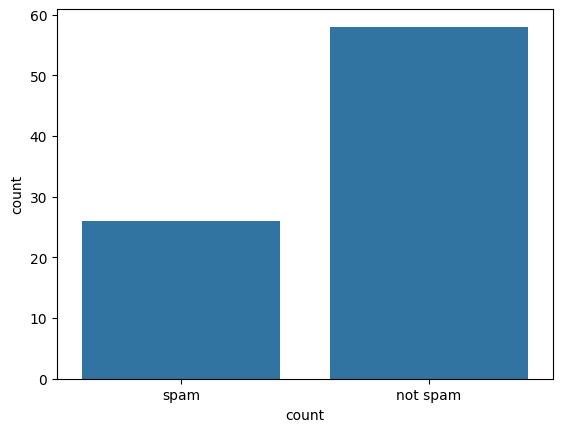

In [ ]:
sns.countplot(data=df,x='type')
plt.xlabel('type')
plt.xlabel('count')
plt.show()
plt.show()

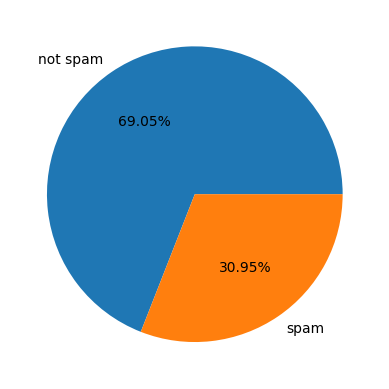

In [ ]:
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index, autopct='%0.2f%%')
plt.show()

In [ ]:
# Install necessary libraries if not already installed
!pip install contractions
!pip install pyspellchecker
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Now you can import the library
import re
import emoji
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Install necessary libraries if not already installed
# !pip install beautifulsoup4 contractions pyspellchecker emoji nltk

# Download NLTK resources if not already downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

spell = SpellChecker()
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # 2. Expand contractions
    text = contractions.fix(text)

    # 3. Remove URLs
    text = re.sub(r'http\S+', '', text)

    # 4. Remove emojis
    # text = emoji.demojize(text)

    # 5. Remove special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    # 6. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 7. Tokenize the text
    tokens = word_tokenize(text)

    # 8. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # 9. Correct spelling
    # tokens = [spell.correction(token) for token in tokens]

    # 10. Perform stemming, but only if the token is not None
    tokens = [stemmer.stem(token) for token in tokens if token is not None] #add token is not none

    # 11. Perform lemmatization, but only if the token is not None
    # tokens = [lemmatizer.lemmatize(token) for token in tokens if token is not None]  #add token is not none

    # 12. Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    # 13. Remove extra whitespace
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text).strip()

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Apply preprocessing to the 'text' column in-place
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,hi jame claim complimentari gift yet compil sp...,spam
1,?? You Earned 500 GCLoot Points,alt_text congratul earn complet follow offer v...,not spam
2,?? Your GitHub launch code,github launch code mortyj octocat stand next r...,not spam
3,[The Virtual Reward Center] Re: ** Clarifications,hello thank contact virtual reward center virt...,not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...",hey prachanda rawal today newslett jampack eve...,spam


In [ ]:
# df['text']=df['text'].str.lower()
# df['text']=df['text'].str.replace('[^\w\s]','',regex=True)

In [ ]:
from sklearn.model_selection import train_test_split


X = df['text']
y = df['type'].map({'spam':1, 'not spam':0})

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
df.shape
df['text']

,text
0,hi jame claim complimentari gift yet compil sp...
1,alt_text congratul earn complet follow offer v...
2,github launch code mortyj octocat stand next r...
3,hello thank contact virtual reward center virt...
4,hey prachanda rawal today newslett jampack eve...
...,...
79,dear maryam would like thank applic role child...
80,dear custom welcom kilimal thank much join us ...
81,dear vladisru steam guard code need login acco...
82,view browser log skrill logo money mover maker...


In [ ]:
y.head()

,type
0,1
1,0
2,0
3,0
4,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf =TfidfVectorizer()
X_train= tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
model= MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.11      0.20         9

    accuracy                           0.69        26
   macro avg       0.84      0.56      0.50        26
weighted avg       0.79      0.69      0.60        26



In [ ]:
  # y_pred=model.predict(X_test)
  # accuracy = accuracy_score(y_test,y_pred)
  # print(accuracy)